In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import csv
import tweepy
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
raw_df = pd.read_csv('CMU_MisCov19_dataset.csv')

fake_news_filter_array = ['conspiracy', 'fake cure', 'fake treatment', 'false fact or prevention', 'false public health response']

a1 = raw_df['annotation1'].unique()
print(a1)
print(fake_news_filter_array)

raw_df

['irrelevant' 'politics' 'true public health response' 'news'
 'calling out or correction' 'sarcasm or satire' 'fake cure' 'conspiracy'
 'true prevention' 'ambiguous or hard to classify'
 'false fact or prevention' 'panic buying'
 'commercial activity or promotion' 'fake treatment' 'emergency'
 'false public health response']
['conspiracy', 'fake cure', 'fake treatment', 'false fact or prevention', 'false public health response']


,status_id,status_created_at,annotation1,annotation2
0,1237387231779840000,Tue Mar 10 14:38:00 +0000 2020,irrelevant,NaN
1,1240175235304960000,Wed Mar 18 07:16:32 +0000 2020,irrelevant,NaN
2,1241324844920320000,Sat Mar 21 11:24:40 +0000 2020,irrelevant,NaN
3,1241872361743360000,Sun Mar 22 23:40:18 +0000 2020,irrelevant,NaN
4,1243024442621440000,Thu Mar 26 03:58:16 +0000 2020,irrelevant,NaN
...,...,...,...,...
4568,1280654762950774785,Wed Jul 08 00:07:43 +0000 2020,calling out or correction,NaN
4569,1280669090835828738,Wed Jul 08 01:04:39 +0000 2020,fake cure,NaN
4570,1280675380014309376,Wed Jul 08 01:29:39 +0000 2020,calling out or correction,NaN
4571,1280676605396836352,Wed Jul 08 01:34:31 +0000 2020,politics,NaN


In [ ]:
fake_tweets_df = raw_df.loc[raw_df['annotation1'].isin(fake_news_filter_array)]

fake_tweets_df.drop(['status_created_at', 'annotation1','annotation2'], axis='columns', inplace=True)
fake_tweets_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,status_id
18,1226276322021978117
20,1227362900970479617
21,1228090968114651138
22,1228608922426249216
24,1232394717641334785
...,...
4561,1280624272134688769
4562,1280626582013517824
4563,1280627431527890947
4566,1280642718549422081


In [ ]:
fake_tweets_df.to_csv("fake_tweets_id.csv", index=False)

In [ ]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

file = open("fake_tweets_df.csv", "w")
writer = csv.writer(file)

writer.writerow(["tweet", "class"])
sleepTime = 2

with open("fake_tweets_id.csv", "r") as tweet_ids:
  for tweet_id in tweet_ids:
    try:
      tweet = api.get_status(tweet_id)
      tweet_text = tweet._json['text']
      
      writer.writerow([tweet_text, 0])
      time.sleep(sleepTime)

    except tweepy.TweepError as e:
      excep_count += 1
      print(e)
      continue
    except StopIteration:
        break

file.close()

In [ ]:
train_df = pd.read_csv("train_df.csv")

In [ ]:
train_df

,tweetOG,tweetBR,class
0,Facebook posts shared in at least three countr...,Postagens do Facebook compartilhadas em pelo m...,0
1,Wisconsin is Òclearly seeing a decline in COVI...,Wisconsin está vendo um declínio no Covid Infe...,0
2,Facebook posts claim a child who is infected w...,Postagens do Facebook Reivindicam uma criança ...,0
3,IndiaÕs Ministry of Home Affairs banning citiz...,Índia Ministério dos Assuntos Internos que pro...,0
4,"42 Democratic senators, plus two Independents,...","42 Senadores democráticos, mais dois independe...",0
...,...,...,...
3519,Another cure for COVID- must watch! https://t....,Outra cura para Covid- deve assistir! https://...,0
3520,And gives billions to Bill Gates and GAVI for ...,E dá bilhões a Bill Gates e Gavi para um tiro ...,0
3521,.@LionHea31111776 This entire covid melodrama ...,@ Lionhea31111776 Todo este melodrama Covid é ...,0
3522,Bill Gates never wears a mask and takes big be...,Bill Gates nunca usa uma máscara e leva grande...,0


Limpeza dos dados

In [ ]:
print("No of missing title\t:", train_df[train_df['tweetOG'].isna()].shape[0])
print("No of missing text\t:", train_df[train_df['tweetBR'].isna()].shape[0])
print("No of missing source\t:", train_df[train_df['class'].isna()].shape[0])

no_of_fakes = train_df.loc[train_df['class'] == 0].count()[0]
no_of_trues = train_df.loc[train_df['class'] == 1].count()[0]

print(no_of_fakes)
print(no_of_trues)



No of missing title	: 0
No of missing text	: 0
No of missing source	: 0
1784
1740


In [ ]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweetOG  3524 non-null   object
 1   tweetBR  3524 non-null   object
 2   class    3524 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 82.7+ KB


In [ ]:
train_df.isnull().sum()

tweetOG    0
tweetBR    0
class      0
dtype: int64

In [ ]:
nltk.download('stopwords')

stop_words = set(stopwords.words('portuguese'))

print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'quem', 'esse', 'minhas', 'ao', 'depois', 'terão', 'delas', 'por', 'tínhamos', 'pelo', 'vos', 'também', 'houver', 'foi', 'aquele', 'como', 'até', 'suas', 'meu', 'tuas', 'no', 'nós', 'houverem', 'se', 'eram', 'esteja', 'à', 'estivemos', 'houveriam', 'houvemos', 'será', 'nem', 'tu', 'num', 'mesmo', 'estiverem', 'serei', 'sejam', 'houvessem', 'ela', 'nossas', 'hajamos', 'fôssemos', 'quando', 'houveria', 'vocês', 'o', 'mas', 'houvera', 'seríamos', 'houveram', 'houverei', 'nossa', 'temos', 'qual', 'estávamos', 'na', 'entre', 'meus', 'tivera', 'estes', 'aqueles', 'estivera', 'são', 'isto', 'houve', 'estivessem', 'é', 'do', 'teu', 'você', 'terá', 'e', 'estamos', 'houvéramos', 'teríamos', 'tiveram', 'houveremos', 'eles', 'com', 'estava', 'seu', 'tua', 'teria', 'tém', 'tivessem', 'essas', 'hei', 'sem', 'dos', 'as', 'teriam', 'me', 'tivemos', 'às', 'fora', 'numa', 'dele', 'tem', 'nosso

In [ ]:
def clean(text):
  
  text = text.lower()
  
  #remove @ mentions
  text = re.sub(r'@[a-z0-9]+','',text)
  
  #remove any kind of link
  text= re.sub(r'http\S+', '', text)

  # Removing numbers
  text = re.sub('[^a-zà-ü]+',' ',text) 

  word_tokens = word_tokenize(text)

  filtered_sentence = []
  for word_token in word_tokens:
      if word_token not in stop_words:
          filtered_sentence.append(word_token)
  
  text = (' '.join(filtered_sentence))
  return text


In [ ]:
nltk.download('punkt')

print(train_df['tweetBR'][10])
print(train_df['tweetBR'][20])
print(train_df['tweetBR'][30])
print(train_df['tweetBR'][40])
print("apos limpeza...")

print(clean(train_df['tweetBR'][10]))
print(clean(train_df['tweetBR'][20]))
print(clean(train_df['tweetBR'][30]))
print(clean(train_df['tweetBR'][40]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Òmy esposa está sofrendo de coronavírus e ela está grávida. O médico disse que ela wonõt sobrevive.
Posts compartilhados com mais de 2.000 vezes em mídias sociais parecem mostrar um Tweet de Donald Trump de Donald Trump, criticando então - o presidente Barack Obamaõ como manuseio da pandemia H1N1 e colocação de @TAL responsabilidade em presidentes em uma crise.
Gov. Andrew Cuomo òwas simplesmente dizendo se pudermos compartilhar 20% do seu excesso, seus ventiladores não utilizados, para ajudar as pessoas em outras partes do estado de forma voluntária, isso seria ótimo. Claro, houve uma reação a isso, o que não foi positivo.
As verificações de alívio de coronavírus de US $ 1.200 este ano são ante um avanço em sua próxima declaração de imposto. É no próximo ano, você está automaticamente indo para Owe $ 1.200 chegando temporada de imposto.
apos limpeza...
òmy esposa sofrendo coronaví

In [ ]:
train_df['tweetBR'] = train_df['tweetBR'].apply(clean)

train_df['tweetBR']

0       postagens facebook compartilhadas menos três p...
1               wisconsin vendo declínio covid infectionó
2       postagens facebook reivindicam criança infecta...
3       índia ministério assuntos internos proíbem cid...
4       senadores democráticos dois independentes vota...
                              ...                        
3519                       outra cura covid deve assistir
3520    dá bilhões bill gates gavi tiro covid esterili...
3521    lionhea todo melodrama covid artificialmente i...
3522    bill gates nunca usa máscara leva grandes bene...
3523                médico encontra cura covid vacina via
Name: tweetBR, Length: 3524, dtype: object

In [ ]:
train_df['tweetBR']

train_df.to_csv('clean_df.csv')

In [ ]:
print(train_df.tweetBR.duplicated().sum())

train_df.drop_duplicates(subset=['tweetBR'], inplace=True)

print(train_df.tweetBR.duplicated().sum())



31
0


In [ ]:
no_of_fakes = train_df.loc[train_df['class'] == 0].count()[0]
no_of_trues = train_df.loc[train_df['class'] == 1].count()[0]

print(no_of_fakes)
print(no_of_trues)

1770
1723


In [ ]:
train_df

,tweetOG,tweetBR,class
0,Facebook posts shared in at least three countr...,postagens facebook compartilhadas menos três p...,0
1,Wisconsin is Òclearly seeing a decline in COVI...,wisconsin vendo declínio covid infectionó,0
2,Facebook posts claim a child who is infected w...,postagens facebook reivindicam criança infecta...,0
3,IndiaÕs Ministry of Home Affairs banning citiz...,índia ministério assuntos internos proíbem cid...,0
4,"42 Democratic senators, plus two Independents,...",senadores democráticos dois independentes vota...,0
...,...,...,...
3519,Another cure for COVID- must watch! https://t....,outra cura covid deve assistir,0
3520,And gives billions to Bill Gates and GAVI for ...,dá bilhões bill gates gavi tiro covid esterili...,0
3521,.@LionHea31111776 This entire covid melodrama ...,lionhea todo melodrama covid artificialmente i...,0
3522,Bill Gates never wears a mask and takes big be...,bill gates nunca usa máscara leva grandes bene...,0


In [ ]:
X = train_df['tweetBR']
y = train_df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=11)

In [ ]:
X_train

1890    usuários medicamento pressão arterial têm risc...
1234    casos aumentam europa onde restrições facilitadas
1662    sintoma perfis amostra conveniência pacientes ...
469     óamerica sido vacinante gado coronavírus anos ...
630     dolores cahill afirma entrevista sobre highwir...
                              ...                        
1307    autoridades saúde sc dizem usam trabalhos másc...
3440    covid mentira vestindo máscara trabalho diabo ...
3194    acorde pessoas foda teórico conspiração execut...
1118                quais complicações neurológicas covid
1959    estudo identifica drogas existentes podem ajud...
Name: tweetBR, Length: 2794, dtype: object

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
array = X_train.toarray()
array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
X_test = vectorizer.transform(X_test)
X_test

<699x7035 sparse matrix of type '<class 'numpy.int64'>'
	with 4802 stored elements in Compressed Sparse Row format>

In [ ]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9606299212598425
0.8669527896995708


In [ ]:
predictions = clf.predict(X_test)
predictions

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm

array([[322,  38],
       [ 55, 284]])

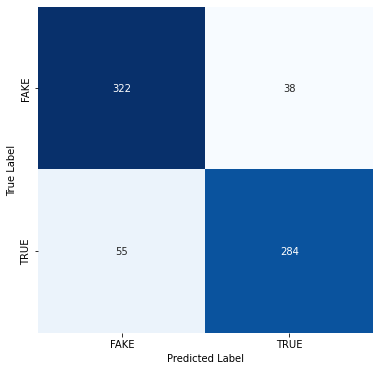

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
result = clf.predict(X_test)

print(accuracy_score(y_test, result))

print (classification_report(y_test, result))

0.8669527896995708
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       360
           1       0.88      0.84      0.86       339

    accuracy                           0.87       699
   macro avg       0.87      0.87      0.87       699
weighted avg       0.87      0.87      0.87       699



In [ ]:
#Exemplo de um tweet classificado como fake news
testSentence = "@DrJohnB2 Meu Deus... mais um elemento além das substâncias das w4cin4s. Óleo de silicone nas seringas. @SF_Moro @mariosabinof @DanielaLima_ @renataagostini @fabiarichter @GiselaSavioli @biodireito @consumidor_gov @JusticaGovBR PROCON? @JanainaDoBrasil @deltanmd @alexandregarcia"

testSentence = clean(testSentence)
vectorizedSentence = vectorizer.transform([testSentence]).toarray()
result = clf.predict(vectorizedSentence)

print(result[0])

0


In [ ]:
def predict_tweet(tweet):

  cleanTweetText = clean(tweet)
  vectorizedSentence = vectorizer.transform([cleanTweetText]).toarray()
  prediction = clf.predict(vectorizedSentence)
  
  if prediction[0] == 0:
    label = 'Fake'
    labelPredict = clf.predict_proba(vectorizedSentence)[:,0][0]
  else:
    label = 'True'
    labelPredict = clf.predict_proba(vectorizedSentence)[:,1][0]

  return label, labelPredict

In [ ]:
tweets_df = pd.read_csv('tweets.csv')

classification_array = []
confidence_array = []

for index, row in tweets_df.iterrows():
    classification, confidence = predict_tweet(row['tweet'])
    classification_array.append(classification)
    confidence_array.append(confidence)


df_predictions = pd.DataFrame({'tweet': tweets_df['tweet'], 'classification': classification_array, 'confidence':  confidence_array})

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

df_predictions ##before

,tweet,classification,confidence
0,devia ter feito essa plaquinha https://t.co/ojpyvRWbCn,Fake,0.900187
1,"@acmacedo @onyxlorenzoni Deixa eu ver se entendi:\nA vacina não serve para prevenir o contágio ,serve para evitar a forma grave da doença certo!? Se ela não evita o contágio significa que mesmo vacinado ou não vai pegar COVID! Então qual o intuito de obrigar o cara a tomar?",Fake,0.984529
2,@DrJohnB2 Meu Deus... mais um elemento além das substâncias das w4cin4s. Óleo de silicone nas seringas. @SF_Moro @mariosabinof @DanielaLima_ @renataagostini @fabiarichter @GiselaSavioli @biodireito @consumidor_gov @JusticaGovBR PROCON? @JanainaDoBrasil @deltanmd @alexandregarcia,Fake,0.990380
3,"RT @gugachacra: Ele diz que não se vacinou contra a Covid19. Mas está cada vez mais claro que tomou. Bobeando, tomou até a dose adicional.…",Fake,0.993581
4,RT @revistaoeste: Bolsonaro proíbe demissão de quem decidir não tomar vacina https://t.co/MNOO0cMVfR,True,0.757247
...,...,...,...
1669,RT @giga_beta: E as armas? \nHomeschooling? \nAi não se aplica né?,True,0.650870
1670,"RT @mitags: Até hoje Amanda não “quer entender” que Bolsonaro só comprou vacinas quando autorizado pelo Congresso.Não duvido que,se houvess…",Fake,0.961783
1671,RT @slpng_giants_pt: 🚨Onyx Lorenzoni censura empresas de exigirem vacinação dos empregados\n\nO governo quer retirar a liberdade dos empresár…,Fake,0.962103
1672,@rmtakata Acontece em r-ns intersexo por genitália ambígua (padrão não-binário).\n\nEx.: na condição genética XXY &gt;q é descrita p meninos&lt; muitos assintomáticos têm sido transformados em genitália feminina ao nascer. \n\nA criança trans compulsória apenas descobre depois d adulta no cariótipo.,Fake,0.974772


In [ ]:
df = df_predictions.loc[df_predictions['classification'] == 'Fake']
df['tweet']

def get_top_n_words(corpus, n=None):
  vec2 = CountVectorizer().fit(corpus)
  bag_of_words = vec2.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec2.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]


In [ ]:
df['tweet']

common_words = get_top_n_words(df['tweet'], 50)
for word, freq in common_words:
  print(word, freq)

de 779
rt 658
que 590
não 456
da 349
https 291
co 287
por 279
pandemia 273
se 258
do 256
covid 253
eu 242
em 233
no 188
pessoas 188
vacina 178
governo 176
as 175
na 167
com 162
mais 157
uma 128
um 127
como 126
máscara 121
casa 120
mas 119
pra 110
19 110
tudo 108
brasil 105
só 101
contra 99
muito 94
milhões 93
gente 90
já 89
para 88
terrorismo 86
os 82
vacinação 81
600 81
tem 75
hoje 75
ele 74
federal 74
me 72
vai 71
existe 71


In [ ]:
no_of_fakes = dfPredictions.loc[dfPredictions['classification'] == 'Fake'].count()[0]
no_of_trues = dfPredictions.loc[dfPredictions['classification'] == 'True'].count()[0]

print(no_of_fakes)
print(no_of_trues)

1241
433
